In [1]:
import tsaug.visualization as v
from typing import Any, Dict, List, Tuple
import numpy as np
import json
import pandas as pd

from data_generator.batch_generator import BatchGenerator
from utils.SYSCONFIG import DATA_PATH

In [2]:
INDEX_PATH: str = f'{DATA_PATH}\\csv_sf_index.txt'
DATA_COLUMNS: List[str] = ['LAV', 'LAX', 'LAY', 'LAZ', 
                'LRV', 'LRX', 'LRY', 'LRZ', 
                'RAV', 'RAX', 'RAY', 'RAZ', 
                'RRV', 'RRX', 'RRY', 'RRZ']
LABEL_COLUMNS = ['LFA', 'RFA']
BATCH_SIZE = 4
SHUFFLE = False
DTYPE: Dict[str, Any] = {
         'LAV': np.float64, 'LAX': np.float64, 'LAY': np.float64,
         'LAZ': np.float64, 'LRV': np.float64, 'LRX': np.float64, 
         'LRY': np.float64, 'LRZ': np.float64, 'RAV': np.float64, 
         'RAX': np.float64, 'RAY': np.float64, 'RAZ': np.float64, 
         'RRV': np.float64, 'RRX': np.float64, 'RRY': np.float64, 
         'RRZ': np.float64, 'LFA': np.int8,    'RFA': np.int8
         }
VERBOSE: bool = True
TABLE_FILE: str = f'{DATA_PATH}\\table_sf.pkl'
META_TABLE_FILE: str = f'{DATA_PATH}\\meta_sf.json'
LENGTH: int = 1024
VALIDATION_GENERATOR: bool = False
TRAIN_TEST_SPLIT: float = 1.0
AUGMENTATOR: Tuple[Any] = None
SAMPLE_FREQ = 512
SAMPLE_OFFSET = 0

if __name__ == '__main__':
     batch_generator = BatchGenerator(index_file=INDEX_PATH, data_columns=DATA_COLUMNS, 
                    label_columns=LABEL_COLUMNS, batch_size=BATCH_SIZE, shuffle=SHUFFLE, 
                    dtype=DTYPE, verbose=VERBOSE, table_file=TABLE_FILE, meta_table_file=META_TABLE_FILE, length=LENGTH, 
                    validation_generator=VALIDATION_GENERATOR, train_test_split=TRAIN_TEST_SPLIT, 
                    augmenter=AUGMENTATOR, sample_freq=SAMPLE_FREQ, sample_offset=SAMPLE_OFFSET, padding=True,
                    pad_last_batch=True)

2022-05-10 12:38:08.151535   [BatchGenerator] Started initialization ...
2022-05-10 12:38:08.151535   [BatchGenerator] Parsing and verifying index C:\Users\ricof\Documents\AI-Cup 2022\data\csv_sf_index.txt
2022-05-10 12:38:08.152550   [BatchGenerator] Found 1 data files.
2022-05-10 12:38:08.152550   [BatchGenerator] Found existing version of table in C:\Users\ricof\Documents\AI-Cup 2022\data\table_sf.pkl
2022-05-10 12:38:08.152550   [BatchGenerator] Found existing meta data file in C:\Users\ricof\Documents\AI-Cup 2022\data\meta_sf.json
2022-05-10 12:38:08.152550   [BatchGenerator] Existing meta data file matches current BatchGenerator parameters.
2022-05-10 12:38:08.152550   [BatchGenerator] Found and loaded current version of table indicating 7 samples across 1 files in C:\Users\ricof\Documents\AI-Cup 2022\data\table_sf.pkl
2022-05-10 12:38:08.152550   [BatchGenerator] Generating batch information for  batches from the data ...
2022-05-10 12:38:08.152550   [BatchGenerator] Generated 2

In [3]:
batch_generator.batches

[[('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\1-1.csv',
   4,
   [0, 512, 1024, 1536])],
 [('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\1-1.csv',
   3,
   [2048, 2560, 3072]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\zero.xsv', 1, [0])]]

In [4]:
X, y = batch_generator.get_data()

2022-05-10 12:38:11.200628   [BatchGenerator] Retrieving all data...
2022-05-10 12:38:11.243829   [BatchGenerator] Retrieved all data.     X : (8, 1024, 16); y : (8, 1024, 2)


In [5]:
import data_generator.batch_generator_functions as bgf

ts = bgf.convert_batches_to_ts(data=y.reshape((2, 4, 1024, 2)), batch_table=batch_generator.batches, center=512, center_offset=256)

<AxesSubplot:>

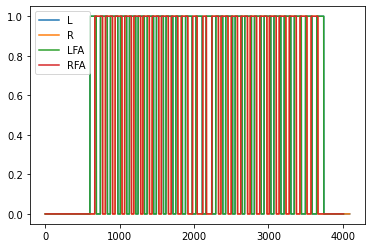

In [13]:
concat_df = pd.DataFrame(ts[0], columns=['L', 'R'])
orig_df = df[['LFA', 'RFA']]

pd.concat([concat_df, orig_df], axis=1).plot()

In [11]:
df = pd.read_csv('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\1-1.csv')
df

,Unnamed: 0.1,Unnamed: 0,LAV,LAX,LAY,LAZ,LRV,LRX,LRY,LRZ,RAV,RAX,RAY,RAZ,RRV,RRX,RRY,RRZ,LFA,RFA
0,0,0,-0.005220,-0.002718,-0.0022,-0.004271,0.204464,0.3,0.0,0.0,0.000746,0.001453,0.000039,-0.000132,-0.526878,-0.6,1.2,0.0,0,0
1,1,1,0.000939,-0.001918,0.0011,0.002829,0.360901,0.5,1.0,-0.2,0.000368,-0.000747,0.001239,0.001268,-0.069108,-0.0,0.5,0.0,0,0
2,2,2,-0.000438,-0.001518,-0.0011,0.001029,0.576958,0.5,-0.3,0.4,0.000896,-0.000647,0.000139,0.001668,-0.589169,-0.8,0.8,0.0,0,0
3,3,3,0.000872,-0.000618,-0.0012,0.002029,0.441913,0.1,0.1,0.5,0.000224,-0.000847,0.000139,0.000968,-0.266165,-0.5,0.9,0.2,0,0
4,4,4,0.000716,-0.000518,-0.0017,0.001829,0.574234,0.4,0.1,0.4,0.000915,-0.000747,0.000139,0.001768,-0.347038,-0.2,0.5,-0.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,4008,4008,-0.000393,0.022782,-0.0028,-0.020571,0.218400,0.2,1.1,-0.2,0.000388,0.016753,0.004739,-0.011632,-0.574554,-0.8,0.6,0.0,0,0
4009,4009,4009,-0.000303,0.022682,-0.0031,-0.020271,0.048795,0.1,0.6,-0.2,0.000224,0.016653,0.004939,-0.011732,-0.407408,-0.7,0.4,0.1,0,0
4010,4010,4010,0.000043,0.022882,-0.0035,-0.019871,0.230400,0.1,0.8,0.0,0.000088,0.016353,0.005139,-0.011632,0.128106,-0.0,0.2,0.2,0,0
4011,4011,4011,-0.000119,0.022882,-0.0040,-0.019971,0.230291,0.1,0.8,0.0,0.000246,0.016353,0.005139,-0.011432,-0.500712,-1.1,1.0,0.4,0,0


In [10]:
import data_generator.batch_generator_functions as bgf

pad_df = bgf.pad_df(df=df,sample_offset=SAMPLE_OFFSET,length=LENGTH,sample_freq=SAMPLE_FREQ)

NameError: name 'df' is not defined

In [12]:
sample_indexes: List[int] = []
index = SAMPLE_OFFSET
print(f'df.shape[0]: {df.shape[0]}')
while index + LENGTH - 1 <= df.shape[0] - 1:
    print(f'{index} + {LENGTH} = {index+LENGTH}')
    sample_indexes.append(index)
    index += SAMPLE_FREQ
    
sample_indexes

df.shape[0]: 4013
0 + 1024 = 1024
512 + 1024 = 1536
1024 + 1024 = 2048
1536 + 1024 = 2560
2048 + 1024 = 3072
2560 + 1024 = 3584


[0, 512, 1024, 1536, 2048, 2560]

In [14]:
sample_indexes: List[int] = []
index = SAMPLE_OFFSET
print(f'pad_df.shape[0]: {pad_df.shape[0]}')
while index + LENGTH - 1 <= pad_df.shape[0] - 1:
    sample_indexes.append(index)
    index += SAMPLE_FREQ
    print(f'{index} + {LENGTH - 1} = {index+LENGTH -1}')
    
sample_indexes

pad_df.shape[0]: 4096
512 + 1023 = 1535
1024 + 1023 = 2047
1536 + 1023 = 2559
2048 + 1023 = 3071
2560 + 1023 = 3583
3072 + 1023 = 4095
3584 + 1023 = 4607


[0, 512, 1024, 1536, 2048, 2560, 3072]

In [9]:
from utils.SYSCONFIG import DATA_PATH

zero_dict = {}
for col in ['LAV', 'LAX', 'LAY', 'LAZ', 'LRV', 'LRX', 'LRY', 'LRZ', 'RAV', 'RAX',
       'RAY', 'RAZ', 'RRV', 'RRX', 'RRY', 'RRZ', 'LFA', 'RFA']:
    zero_dict[col] = np.zeros(4096)
zero_df = pd.DataFrame(zero_dict)
zero_df.to_csv(f'{DATA_PATH}\\zero.xsv', index=False)
zero_df

,LAV,LAX,LAY,LAZ,LRV,LRX,LRY,LRZ,RAV,RAX,RAY,RAZ,RRV,RRX,RRY,RRZ,LFA,RFA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
pd.read_csv('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\zero.xsv')

,LAV,LAX,LAY,LAZ,LRV,LRX,LRY,LRZ,RAV,RAX,RAY,RAZ,RRV,RRX,RRY,RRZ,LFA,RFA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
sample_indexes: List[int] = []
index = batch_generator.sample_offset
while index + batch_generator.length < df.shape[0]:
    sample_indexes.append(index)
    index += batch_generator.sample_freq
sample_indexes

[0, 512, 1024, 1536, 2048, 2560]

In [13]:
len(batch_generator)

7

In [5]:
time_series = {}
ys = []

for batch_nr in range(len(batch_generator)):
    batch_info = batch_generator.batches[batch_nr]
    X, y = batch_generator.__getitem__(batch_nr)
    ys.append(y)
    offset = 0
    for piece in batch_info:
        file, samples, indices = piece
        if file not in time_series.keys():
            time_series[file] = {}
        time_series[file][batch_nr] = [i for i in range(offset, len(indices) + offset)]
        offset += len(indices)

collected = {}
for key in time_series.keys():
    parts_dict = time_series[key]
    parts = []
    for batch_nr in parts_dict.keys():
        batch = ys[batch_nr]
        indices = parts_dict[batch_nr]
        for index in indices:
            parts.append(batch[index])
    collected[key] = parts

In [7]:
key_11 = 'C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\1-1.csv'
key_12 = 'C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\1-2.csv'
key_15 = 'C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\1-5.csv'

ts = batch_generator.concat_ts_partials(collected[key_15])
ts.shape

(2560, 2)

<AxesSubplot:>

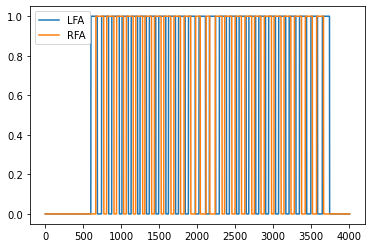

In [8]:
orig_11 = pd.read_csv(key_11)
orig_11[['LFA', 'RFA']].plot()

In [3]:
# meta-table.json
meta = {}
meta_keys = ['batch_size', 'shuffle', 'length', 'sample_freq', 'sample_offset', 'index_file', 'table_file', 'padding', 'file_list', 'total']
for key in meta_keys:
    meta[key] = vars(batch_generator)[key]

In [8]:
path = 'test.json'
with open(path, 'w') as f:
    json.dump(meta, f)

In [9]:
path = 'test.json'
with open(path, 'r') as f:
    meta_copy = json.load(f)

In [3]:
import pickle

with open(TABLE_FILE, 'rb') as f:
    table = pickle.load(f)
table

[('C:\\Informatik\\workspaces\\workspace_python\\AI-Cup\\data\\1-1-step.csv',
  6,
  [0, 512, 1024, 1536, 2048, 2560]),
 ('C:\\Informatik\\workspaces\\workspace_python\\AI-Cup\\data\\1-2-step.csv',
  6,
  [0, 512, 1024, 1536, 2048, 2560]),
 ('C:\\Informatik\\workspaces\\workspace_python\\AI-Cup\\data\\1-3-step.csv',
  6,
  [0, 512, 1024, 1536, 2048, 2560]),
 ('C:\\Informatik\\workspaces\\workspace_python\\AI-Cup\\data\\1-4-step.csv',
  6,
  [0, 512, 1024, 1536, 2048, 2560]),
 ('C:\\Informatik\\workspaces\\workspace_python\\AI-Cup\\data\\1-5-step.csv',
  7,
  [0, 512, 1024, 1536, 2048, 2560, 3072]),
 ('C:\\Informatik\\workspaces\\workspace_python\\AI-Cup\\data\\10-1-step.csv',
  7,
  [0, 512, 1024, 1536, 2048, 2560, 3072]),
 ('C:\\Informatik\\workspaces\\workspace_python\\AI-Cup\\data\\10-2-step.csv',
  6,
  [0, 512, 1024, 1536, 2048, 2560]),
 ('C:\\Informatik\\workspaces\\workspace_python\\AI-Cup\\data\\10-3-step.csv',
  5,
  [0, 512, 1024, 1536, 2048]),
 ('C:\\Informatik\\workspaces\\

In [4]:
X, y = batch_generator.__getitem__(0)

(<Figure size 1152x4608 with 32 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       dtype=object))

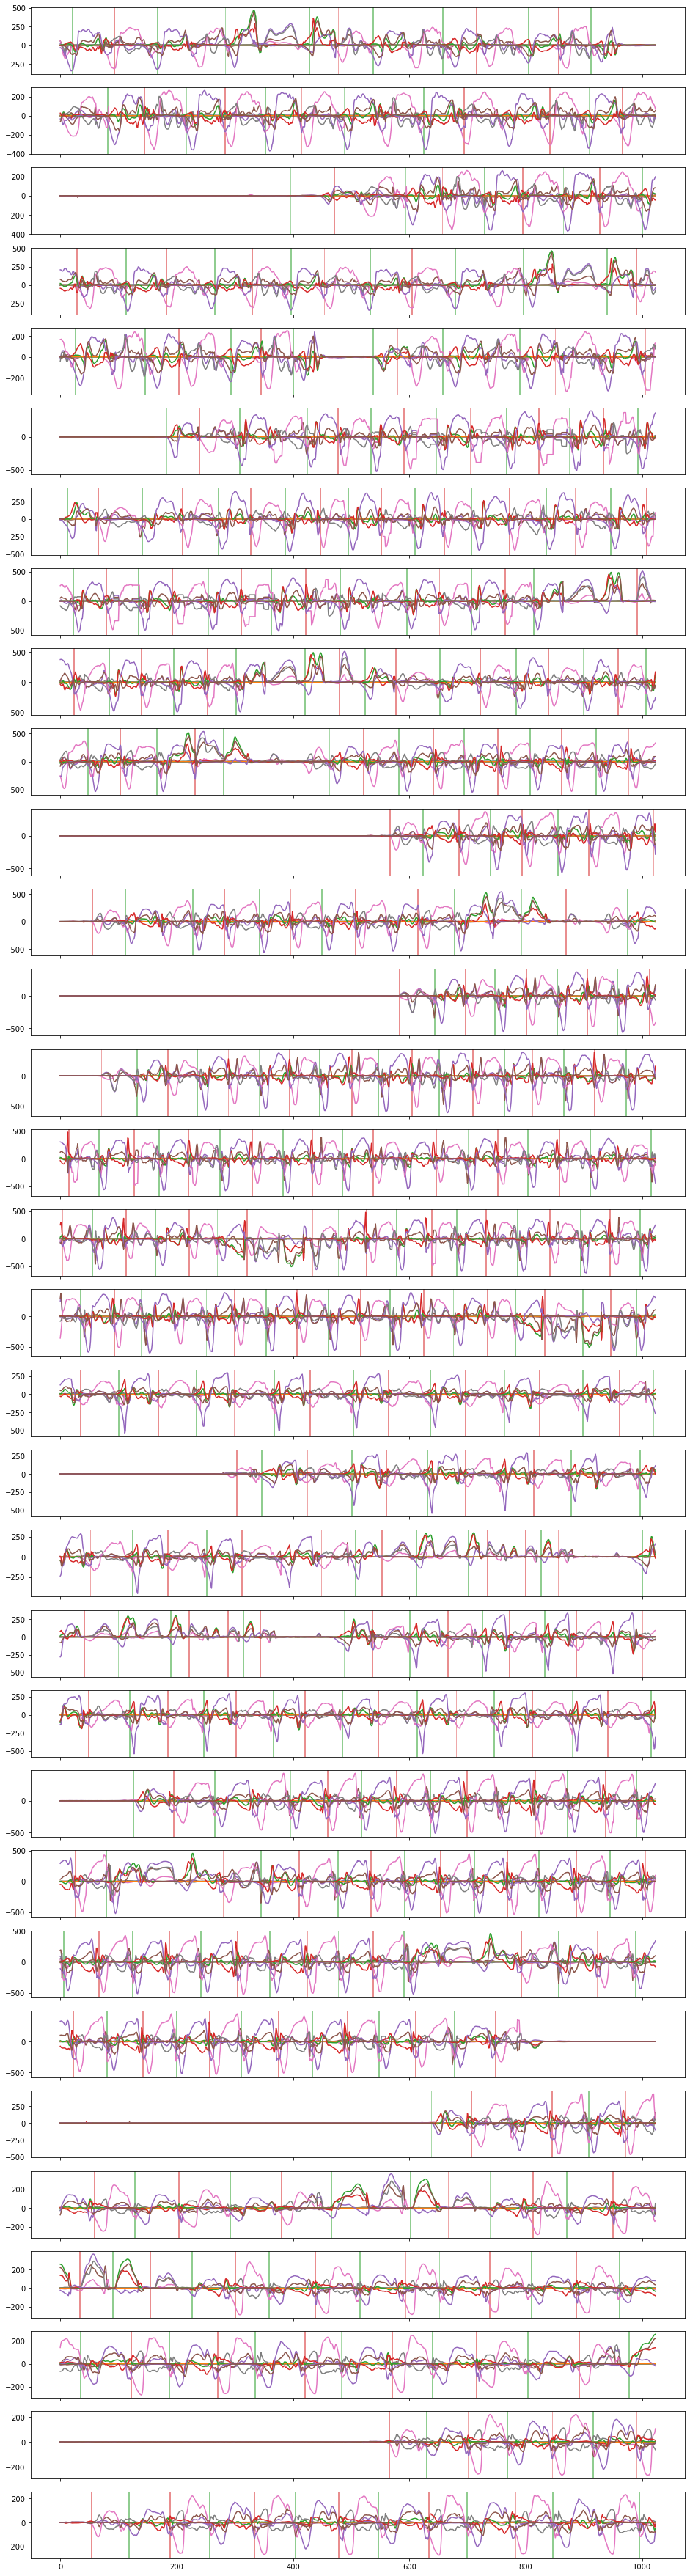

In [5]:
v.plot(X, y)